# Met Office Climate Data Hackathon

## Using xarray with UK Climate Projections data

This notebook shows you how to work with the UK Climate Projections netCDF files available on the CEDA Archive 
using the xarray Python library. It demonstrates:
 * how to read in a dataset
 * perform a few statistical tasks
  * calculate decadal means
  * calculate a simple spatial-averaging  
  * calculate monthly anomalies
 * how to create a simple and more advanced plots

This module requires the following:

*  Python packages in your environment 
 * xarray
 * numpy
 * cartopy
 
* UKCP data files
 * monthly mean surface air temperature (available from CEDA Archive [here](http://dap.ceda.ac.uk/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/tas/mon/latest/tas_rcp85_land-rcm_uk_12km_01_mon_198012-208011.nc))
 * land mask (available from [here](https://github.com/COP26-Hackathon/Met-Office-Climate-Data-Challenge-March_2021/blob/main/Wiki/assets/lsm_land-rcm_uk_12km.nc)
 * daily maximum surface air temperatures (available from CEDA Archive [here](http://data.ceda.ac.uk/badc/ukcp18/data/land-rcm/uk/12km/rcp85/01/tasmax/day/latest))

## Preparatory actions
Load xarray and other relevant packages

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import cartopy.crs as ccrs
%matplotlib inline

Assign file locations

In [27]:
UKCP_FILE = 'Insert directory for downloaded file here/tas_rcp85_land-rcm_uk_12km_01_mon_198012-208011.nc'
UKCP_FILE_LAND_MASK = 'Insert directory for downloaded file here/lsm_land-rcm_uk_12km.nc'
UKCP_FILE_DIRECTORY_TASMAX = 'Insert directory for downloaded file here'

 Load one or more netcdf data files into a dataset

In [4]:
dat=xr.open_mfdataset(UKCP_FILE)

Show the metadata

In [5]:
print('dataset ',dat)
print('data variables ',dat.data_vars)
print('data values ',dat.values)
print('values of time axis ',dat.coords['time'].values)
print('year values of time axis ',dat.coords['time'].dt.year.values)

dataset  <xarray.Dataset>
Dimensions:                       (bnds: 2, ensemble_member: 1, projection_x_coordinate: 82, projection_y_coordinate: 112, time: 1200)
Coordinates:
  * ensemble_member               (ensemble_member) int32 1
  * time                          (time) object 1980-12-16 00:00:00 ... 2080-...
  * projection_y_coordinate       (projection_y_coordinate) float64 -1.02e+05...
  * projection_x_coordinate       (projection_x_coordinate) float64 -2.1e+05 ...
    ensemble_member_id            (ensemble_member) |S27 dask.array<chunksize=(1,), meta=np.ndarray>
    grid_latitude                 (projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(112, 82), meta=np.ndarray>
    grid_longitude                (projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(112, 82), meta=np.ndarray>
    month_number                  (time) int32 dask.array<chunksize=(1200,), meta=np.ndarray>
    year                          (time) int

Select a data array and store in deca then print values

In [6]:
deca=dat.tas
print('values of data array ',deca.values)

values of data array  [[[[10.572838  10.57409   10.573993  ...  4.2704988  3.9337776
     3.7312722]
   [10.5091715 10.506336  10.500982  ...  4.0824256  3.857765
     3.689874 ]
   [10.45461   10.449013  10.441854  ...  3.9022734  3.7363775
     3.5822053]
   ...
   [ 5.554039   5.5632734  5.568901  ...  4.3970437  3.9209764
     2.9300287]
   [ 5.5127134  5.5592875  5.567969  ...  4.35584    3.8113449
     2.6090558]
   [ 5.505737   5.529365   5.5517626 ...  4.2395344  3.6436915
     2.4931693]]

  [[10.8545885 10.817315  10.789959  ...  5.3478227  5.095278
     4.953752 ]
   [10.800367  10.767013  10.740581  ...  5.194127   5.077076
     4.94965  ]
   [10.74936   10.707906  10.678672  ...  5.0930386  4.9980087
     4.8992662]
   ...
   [ 6.3170085  6.3096304  6.3096714 ...  6.0091066  5.8549833
     5.660276 ]
   [ 6.3050585  6.320441   6.3148546 ...  5.964722   5.8050027
     5.6040025]
   [ 6.233391   6.2660275  6.2974954 ...  5.9221044  5.7575097
     5.5582037]]

  [[10.851793  

## Resample data to decadal means
Resample array to decadal means, with year starting 1st Dec

In [7]:
deca3=deca.resample(time="10AS-DEC",).mean()      # works in vn 16 but not 11
print(deca3['time'])

<xarray.DataArray 'time' (time: 10)>
array([cftime.Datetime360Day(1980, 12, 1, 0, 0, 0, 0),
       cftime.Datetime360Day(1990, 12, 1, 0, 0, 0, 0),
       cftime.Datetime360Day(2000, 12, 1, 0, 0, 0, 0),
       cftime.Datetime360Day(2010, 12, 1, 0, 0, 0, 0),
       cftime.Datetime360Day(2020, 12, 1, 0, 0, 0, 0),
       cftime.Datetime360Day(2030, 12, 1, 0, 0, 0, 0),
       cftime.Datetime360Day(2040, 12, 1, 0, 0, 0, 0),
       cftime.Datetime360Day(2050, 12, 1, 0, 0, 0, 0),
       cftime.Datetime360Day(2060, 12, 1, 0, 0, 0, 0),
       cftime.Datetime360Day(2070, 12, 1, 0, 0, 0, 0)], dtype=object)
Coordinates:
  * time     (time) object 1980-12-01 00:00:00 ... 2070-12-01 00:00:00


Produce a mean across spatial variables. Note, this doesn't have area weighting!

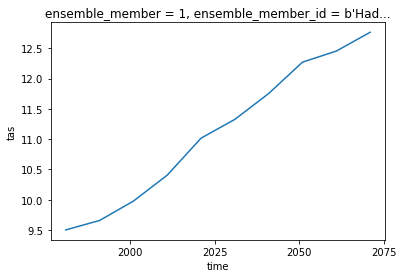

In [8]:
deca4=deca3.mean(dim=['projection_x_coordinate','projection_y_coordinate']).squeeze()
deca4.plot()

## Plot a smoothed time series of monthly means
Create a running mean in deca5, plot then overplot higher frequency values from deca

/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


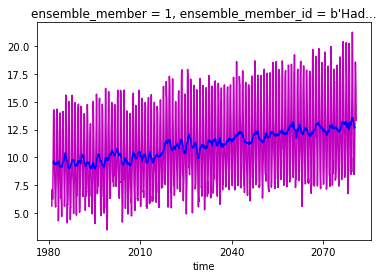

In [9]:
deca5=deca.rolling(time=12,center=True).mean()
deca.mean(dim=['projection_x_coordinate','projection_y_coordinate']).squeeze().plot(color='m')
deca5.mean(dim=['projection_x_coordinate','projection_y_coordinate']).squeeze().plot(color='b')

## Plot a map
Make a simple plot of the first time in the data

In [10]:
print(deca)

<xarray.DataArray 'tas' (ensemble_member: 1, time: 1200, projection_y_coordinate: 112, projection_x_coordinate: 82)>
dask.array<open_dataset-fa624b8465251092d4aef09e6e4dcdb2tas, shape=(1, 1200, 112, 82), dtype=float32, chunksize=(1, 1200, 112, 82), chunktype=numpy.ndarray>
Coordinates:
  * ensemble_member          (ensemble_member) int32 1
  * time                     (time) object 1980-12-16 00:00:00 ... 2080-11-16...
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.02e+05 ... ...
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.1e+05 ... 7...
    ensemble_member_id       (ensemble_member) |S27 dask.array<chunksize=(1,), meta=np.ndarray>
    grid_latitude            (projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(112, 82), meta=np.ndarray>
    grid_longitude           (projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(112, 82), meta=np.ndarray>
    month_number             (time) int32 das

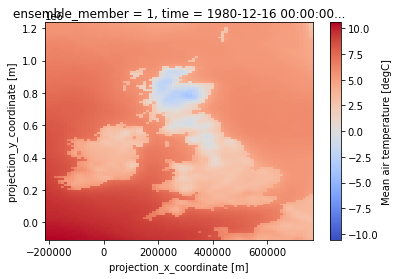

In [11]:
deca[0,0,:,:].plot(cmap='coolwarm')

Apply a land/sea mask then plot

Text(0.5, 1.0, 'first dataarray with land/sea mask applied')

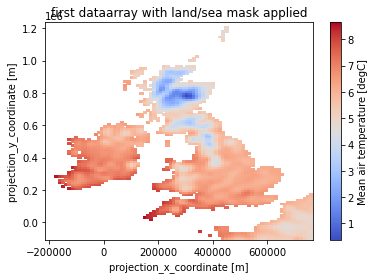

In [12]:
mask=xr.open_dataset(UKCP_FILE_LAND_MASK)
deca6=deca[0,1,:,:].where(mask.lsm>0)
deca6.plot(cmap='coolwarm')
plt.title('first dataarray with land/sea mask applied')

Nicer example plot of OSGB data on PlateCarree grid

/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.


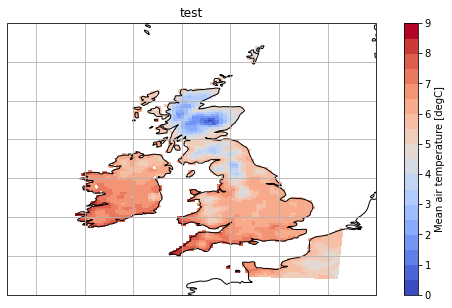

In [13]:
plt.figure(figsize=[10,5])
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.gridlines()

deca6.plot(levels=20,cmap='coolwarm',transform=ccrs.OSGB())
ax.set_title('test')
ax.set_extent([-14,5,48,62])

 Plot with more control over options

/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.


Text(0.5, 1.0, 'Plot title here deg C \n')

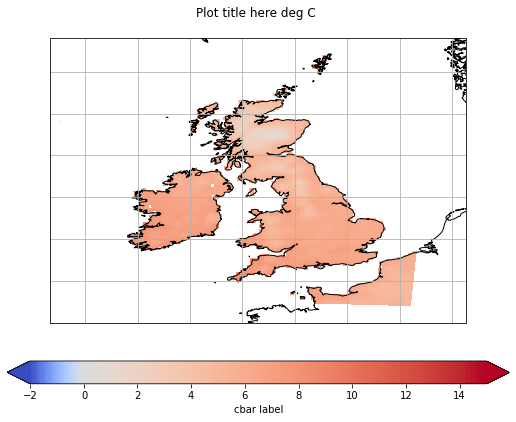

In [14]:
plt.figure(figsize=(10,7))
ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()

normplot=TwoSlopeNorm(vcenter=0,vmin=-2,vmax=15)
deca6.plot.pcolormesh(ax=ax,norm=normplot,cmap='coolwarm',
                           transform=ccrs.OSGB(),extend='both',
                           cbar_kwargs=dict(orientation='horizontal',label='cbar label',shrink=0.9,pad=0.1))
ax.set_title('Plot title here deg C \n')

## Working with daily files
Load up some new daily tmax data and select period to 2050

In [20]:
path=UKCP_FILE_DIRECTORY_TASMAX
fi='/tasmax_rcp26_land-gcm_uk_60km_*.nc'
tasmax_ds=xr.open_mfdataset(path+fi)
tasmax_da=tasmax_ds.tasmax.sel(time=slice('1980','2050'))
print(tasmax_ds)

<xarray.Dataset>
Dimensions:                       (bnds: 2, ensemble_member: 1, projection_x_coordinate: 17, projection_y_coordinate: 23, time: 72000)
Coordinates:
  * ensemble_member               (ensemble_member) int32 4
  * time                          (time) object 1899-12-01 12:00:00 ... 2099-...
  * projection_y_coordinate       (projection_y_coordinate) float64 -9e+04 .....
  * projection_x_coordinate       (projection_x_coordinate) float64 -2.1e+05 ...
    ensemble_member_id            (ensemble_member) |S27 dask.array<chunksize=(1,), meta=np.ndarray>
    latitude                      (projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(23, 17), meta=np.ndarray>
    longitude                     (projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(23, 17), meta=np.ndarray>
    month_number                  (time) int32 dask.array<chunksize=(3600,), meta=np.ndarray>
    year                          (time) int32 dask.arr

Calculate monthly anomalies of tmax over region

In [16]:
climatology=tasmax_da.sel(time=slice('1981','2000')).groupby('time.month').mean().squeeze()
tasmax_anom=(tasmax_da.sel(time=slice('1981','2100')).groupby('time.month')-climatology).squeeze()

tasmax_anom_xymean=tasmax_anom.mean(dim=['projection_y_coordinate','projection_x_coordinate']).squeeze()
tasmax_anom_xymean_annual=tasmax_anom_xymean.resample(time='AS-DEC').mean()

In [24]:
climatology=tasmax_da.sel(time=slice('1981','2000')).groupby('time.month').mean().squeeze()
tasmax_mon=tasmax_da.sel(time=slice('1981','2100')).resample(time='M').mean().squeeze()
tasmax_anom=(tasmax_mon.groupby('time.month')-climatology).squeeze()

tasmax_anom_xymean=tasmax_anom.mean(dim=['projection_y_coordinate','projection_x_coordinate']).squeeze()
tasmax_anom_xymean_annual=tasmax_anom_xymean.resample(time='AS-DEC').mean()

Let's also compare with absolute values of monthly mean tmax across region

In [17]:
tasmax_annual=tasmax_da.sel(time=slice('1981','2100')).mean(dim=['projection_y_coordinate',
                                'projection_x_coordinate']).resample(time='M').mean().squeeze()

Now plot the results

(-5.0, 25.0)

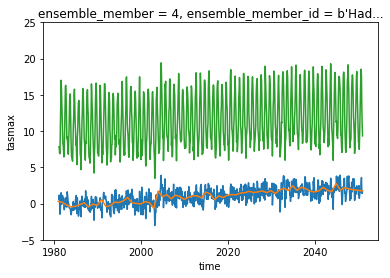

In [26]:
tasmax_anom_xymean.plot()              # monthly anomalies  
tasmax_anom_xymean_annual.plot()       # annual mean of anomalies
tasmax_annual.plot()                   # absolute values
plt.ylim([-5,25])